In [2]:
def f1(x, y, th=1, th0=1):
    return (-2*(y - x * th - th0) * x, -2 * (y - th* x - th0))
[
    f1(1,3), 
    f1(1,1),
    f1(3,2),
    f1(3,6)
]

[(-2, -2), (2, 2), (12, 4), (-12, -4)]

In [5]:
print('a', 1/9+1/36)
print('c', 51/60)
print('b', 1/9+1)

a 0.1388888888888889
c 0.85
b 1.1111111111111112


# LAB

> 1A) Consider the solution with the 0th-order basis (the regression polynomial described by only θ0\theta_0θ0​). What is the shape of the solution that you expect, and why? How does this solution depend on training data? Does this match what you observe in running t1 with order 0?

This should be horizontal line that is shifted up or down towards better SE. Match.

> 1B) Polynomial order 9 is particularly interesting. What do you expect to be true about the solution, and why? (Hint: you are given 10 points in the training data). Does this match what you observe in running t1 with order 9?

Should be overfit. Exactly at those points. Match.

> To answer the questions below, you should run the codebox above with various orders from 1 to 9 and observe plots and values of θ\thetaθ, θ0\theta_0θ0​. Make sure to click "submit".

> 1C) From your observation in the previous question, what is problematic if the polynomial order gets too big?

From about 7-8 order it goes almost directly by points. Overfitting.

> 1D) Look at the values of θ\thetaθ and θ0\theta_0θ0​ you obtain, shown in the results. How does the magnitude of θ\thetaθ change with order? (You don't have to answer this quantitatively.)

Increases from about 1 digit to 3-4 digits before dot.

> 1E) What polynomial order do you feel represents the hypothesis that will be the most predictive for new data?

3-4 is good because it seems no such overfit.

> 1F) When we run 10-fold cross validation on this data set, varying the order from 0 to 8 (because we train on 9 training data points for each instance of 10-fold cross validation), we get the following mean squared error results:  [0.69206670716618535, 0.53820006043438084, 0.73424762793041687, 0.2835495578961193, 0.74338564580774558, 0.61422551802155112, 6.156711267187811, 356.8873742619765, 408.34678081302491]

> What is the best order, based on this data? Does it agree with your previous answer?

Best is 3 order because error result is the least, 0.28 whereas the worst is 8 order (overfitting). Agree.
 
> 1G) Abstractly, if we were to use a polynomial model with orders higher than 9 (e.g., 12), should it be possible for that polynomial to go through all the points?

Yes (but no), if we use order that is close to the number of points. Example is points on a sin function.

> 1H) Now, actually run t1 with orders higher than 9 (e.g., 12). Does the learned polynomial go through all the points? Remember that t1 is fitting the polynomial analytically (directly using matrix inversion) as discussed in the notes on regression. Would we expect matrix inversion to work well for models with orders higher than 9 for this data?

It did't go through all. Matrix inversion don't work well for models higher than 9 as the experiment shows.



## 2) 

> 2A) What happens to both Jridge(θ,θ0)J_{\it ridge}(\theta, \theta_0)Jridge​(θ,θ0​) and the learned regression line, with very large (e.g., infinite) and very small (0) values of λ\lambdaλ?

With lambda close to 0 (tried 1e-7) the overfit increases for the regulirized (green) model. With large lambda (1e10) it is 'underfit', just a lin because regularizer penalizes large norm of theta, i.e. making theta almost 0 and only theta_0 contributes to moving the line so that it fits closer to the training examples. 

> 2B) If our goal is to solely minimize 1n∑i=1nL(x(i),y(i),θ,θ0)\frac{1}{n} \sum_{i = 1}^n L(x^{(i)}, y^{(i)}, \theta, \theta_0)n1​∑i=1n​L(x(i),y(i),θ,θ0​), what would be the best value of λ\lambdaλ?

Then lambda should be 0 as then we would minize only those L (but overfit).

> 2C) What value of λ\lambdaλ do you feel will give good performance on new data from the same source?

Don't know. Tried 10, 1, 0.1, 0.01, 0.001. It looks like overfit with 0.001 so probably 0.01 or 0.1 is better.

> 2D) When we run leave-one-out cross validation on this data set, using 9th order features, varying λ\lambdaλ from 0.01 to 0.3, we get the following plot:

> What is the best value of λ\lambdaλ, in terms of generalization performance, based on this data? Does it agree with your previous answer? Is it the same as the best value for performance on the training set?

The best is near 0.1 because mse on the new data is lowest for this. Yes, it agrees! 



## 3) 


> 3A) With max_iter = 1000  in the code snippet above, what step sizes were needed to match the analytic solution almost exactly for 1st and 2nd order bases? (Use the convergence plot to help decide on whether the two curves "match almost exactly.")


It diverges near 0.44 (figure 1). And before that it almost match exactly the analytical solution (fig. 2)

Figure 1. Diverge. With `t3(order=2, lam=0, step_size= 0.439, max_iter = 1000)`

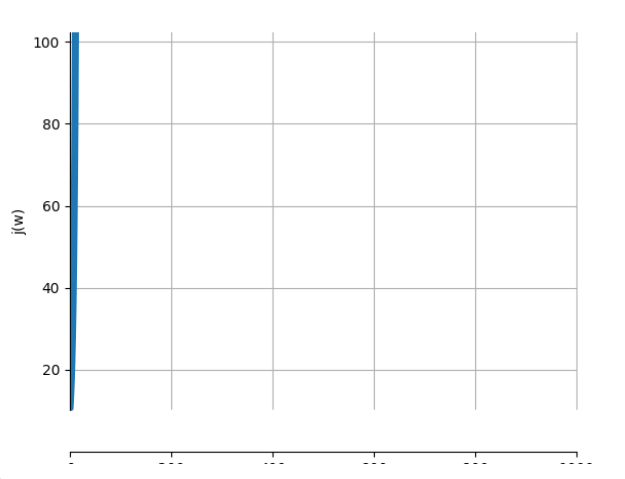


Fig. 2. Almost the same as analytical. `t3(order=2, lam=0, step_size= 0.41, max_iter = 1000)`

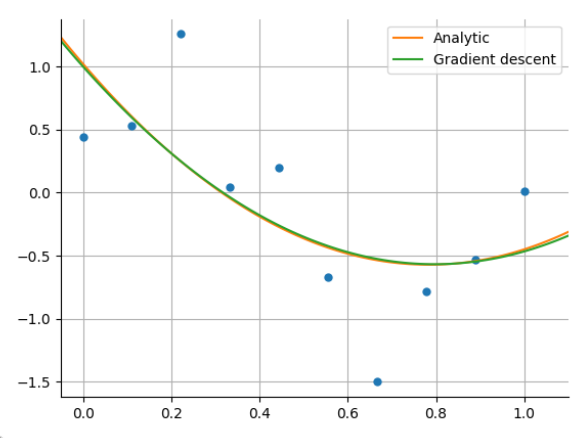


For order 1. It converges and matches the analytical solution around 0.02. See fig. 3


Fig 3. t3(order=1, lam=0, step_size= 0.02, max_iter = 1000)

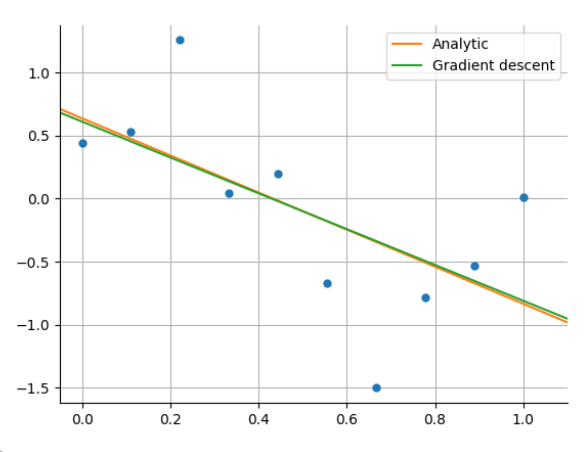


> 3B) What step size allowed you to get similar curves to the analytical solution for 3rd order? (Use the convergence plot to help decide whether the two curves are "similar.")

Best I could get to match GD curve to analytical one is with 0.39 step size and 10K steps. Fig. 4.

FIg. 5. Matching GD curve to analytical one. `t3(order=3, lam=0.00001, step_size= 0.39, max_iter = 10000)`

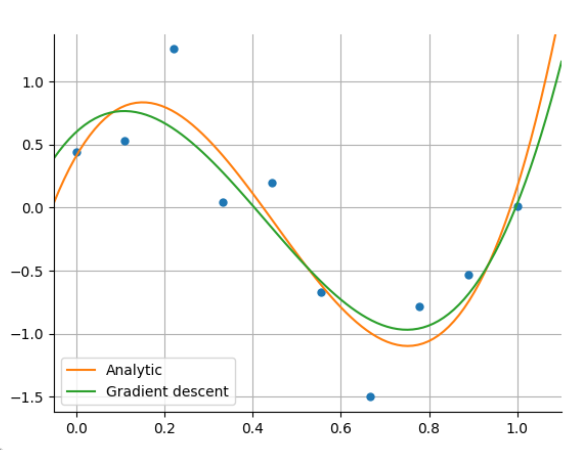


Increasing lambda resulted in increase of structural error (flat line). Meaning our line could fit the data well. See fig. 6.

Fig. 6. Increasing lambda. ` t3(order=3, lam=0.1, step_size= 0.39, max_iter = 10000)`


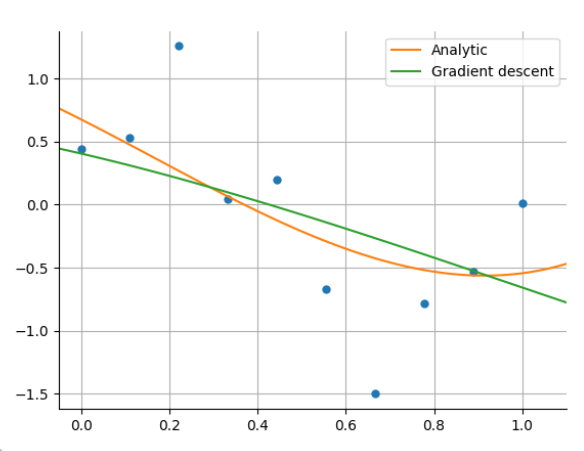

> 3C) For 9th order, play around for a while (no more than 10 minutes) to see how close you can get to the analytic solution. How does it compare to the analytical solution?

The closest one I could get had step size less than the order of 3: 0.325. With 0.39 as previously it diverged. 

Fig. 7. Closest one `t3(order=9, lam=0, step_size= 0.325, max_iter = 10000)`

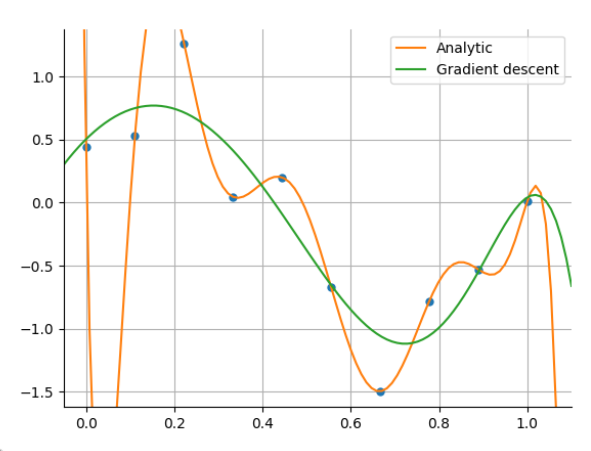